In [1]:
import functions.uap as uap
import pickle as pk

from sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
df = uap.get_data()

In [3]:
X_train, X_test, y_train, y_test = uap.get_baseline_data(df, 'target')
reg_base_model = LinearRegression()
reg_base_model.fit(X_train, y_train)
uap.check_regression(reg_base_model, X_train, X_test, y_train, y_test)


|Score|Test|Train|
|:--|--:|--:|
|MAE|19.557|19.054|
|MSE|849.519|787.234|
|R² Score|0.614|0.641|


/home/boesi/lessons/2025-05-06-ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/boesi/lessons/2025-05-06-ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/boesi/lessons/2025-05-06-ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/metr

--- Test data ---
                       precision    recall  f1-score   support

                 Good       0.82      0.85      0.83      3067
             Moderate       0.58      0.72      0.65      2106
Unhealthy f. Sens. G.       0.50      0.05      0.09       483
            Unhealthy       0.58      0.37      0.45       403
       Very Unhealthy       0.00      0.00      0.00        45
            Hazardous       0.00      0.00      0.00         8

             accuracy                           0.70      6112
            macro avg       0.41      0.33      0.34      6112
         weighted avg       0.69      0.70      0.68      6112



/tmp/ipykernel_1136123/3431447603.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


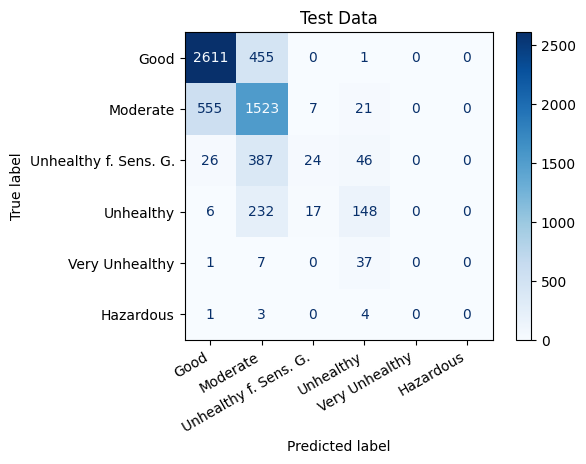

In [4]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat, y_labels = uap.get_baseline_data(df, 'target_aqi', factorize_target=True)
cat_base_model_aqi = LogisticRegression()
cat_base_model_aqi.fit(X_train_cat, y_train_cat)
fig = uap.check_classification(cat_base_model_aqi, X_train_cat, X_test_cat, y_train_cat, y_test_cat, y_labels, train=False)
fig.show()
fig.savefig('images/model_baseline_aqi.png')

/home/boesi/lessons/2025-05-06-ds-ml-project/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_1136123/3553450198.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


--- Test data ---
              precision    recall  f1-score   support

     Healthy       0.93      0.96      0.94      5173
   Unhealthy       0.72      0.63      0.67       939

    accuracy                           0.91      6112
   macro avg       0.83      0.79      0.81      6112
weighted avg       0.90      0.91      0.90      6112



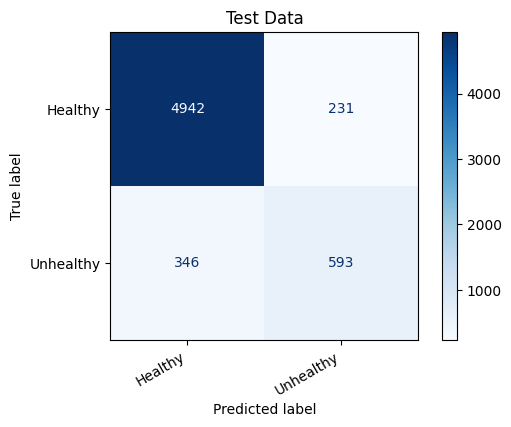

In [5]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat, y_labels = uap.get_baseline_data(df, 'target_health', factorize_target=True)
cat_base_model_healthy = LogisticRegression()
cat_base_model_healthy.fit(X_train_cat, y_train_cat)
fig = uap.check_classification(cat_base_model_healthy, X_train_cat, X_test_cat, y_train_cat, y_test_cat, y_labels, train=False)
fig.show()
fig.savefig('images/model_baseline_health.png')

In [6]:
with open('models/base_linreg_model.pkl', 'wb') as f:
    pk.dump(reg_base_model, f)
with open('models/base_logreg_model_aqi.pkl', 'wb') as f:
    pk.dump(cat_base_model_aqi, f)
with open('models/base_logreg_model_healthy.pkl', 'wb') as f:
    pk.dump(cat_base_model_healthy, f)
